In [62]:
# Import libraries 

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# clustering 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler 
from sklearn import metrics

# filter wrangling
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import mysql.connector
from mysql.connector import Error

In [3]:
# define mysql details
host   = 'okegarden-laravel-prod-db-2024-11-15-0200.cgwhhgh85mr3.ap-southeast-3.rds.amazonaws.com'
port   = '3306'
user   = 'intern_mes'
passwd = 'sdfDFLES342982Ddlsdksd'
databs = 'okegarden_laravel_prod_db'

In [4]:
# function to fetch data from database, the connection is closed after use.
def fetch_data(host_name, port_name, user_name, user_password, db_name, query, params=None):
    try:
        # use with to ensure the connection is closed after use
        with mysql.connector.connect(
            host=host_name,
            port=port_name,
            user=user_name,
            password=user_password,
            database=db_name
        ) as connection:
            data = pd.read_sql(query, connection, params=params) # read the query to dataframe format
            return data

    except Error as e:
        print(f"Error while connecting to MySQL or fetching data: {e}")
        return None

### Table Order Garden Care Detail

In [5]:
# usage example (the mysql detail already defined)
# simple query
query_order_garden_care = """
SELECT
  order_garden_care_detail.id AS id,
  order_garden_care_detail.id_order_garden_care AS id_order_garden_care,
  order_garden_care_detail.status AS status,
  order_garden_care.id_user,
  order_garden_care.price,
  garden_care.care_count AS jumlah_perawatan,
  garden_care.manpower AS manpower_required,
  order_garden_care.address,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_garden_care.created_at AS order_date 
FROM
  order_garden_care_detail
  JOIN order_garden_care ON order_garden_care_detail.id_order_garden_care = order_garden_care.id
  JOIN garden_care ON garden_care.id = order_garden_care.id_garden_care
  JOIN address_components ON order_garden_care.id = address_components.address_componentable_id
  JOIN user ON order_garden_care.id_user = user.id_user
WHERE
  (
    order_garden_care_detail.maintenance_schedule IS NULL
  )
  AND (
    (order_garden_care_detail.status <> 'expired')
    OR (order_garden_care_detail.status IS NULL)
  )
  AND address_components.address_componentable_type LIKE '%OrderGardenCare'
GROUP BY
  order_garden_care_detail.id_order_garden_care,
  order_garden_care_detail.status,
  order_garden_care.id_user,
  garden_care.care_count,
  garden_care.manpower,
  order_garden_care.address,
  order_garden_care.price,
  address_components.latitude,
  address_components.longitude,
  order_garden_care.created_at

"""

In [7]:
# fetch data using function
df_ogc = fetch_data(host, port, user, passwd, databs, query_order_garden_care)

In [8]:
df_ogc

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02
...,...,...,...,...,...,...,...,...,...,...,...
96,1424,278,paid,1349,0.0,1,1,Nama Klien: Ruben onsu/ Sarwendah\nAlamat : Jl...,-6.28399,106.799,2024-11-10 17:25:39
97,1426,279,paid,1349,0.0,12,1,DKI Jakarta,-6.19445,106.823,2024-11-10 17:30:09
98,1449,287,paid,1937,0.0,12,1,"alia residence, jln. alia 6 no. 22 Jatimelati ...",-6.31348,106.937,2024-11-12 11:22:32
99,1473,289,paid,1451,0.0,6,1,Cluster nara village Jalan boulevard no.17,-6.16404,106.903,2024-11-12 14:25:56


In [9]:
# order_garden_care_detail info
df_ogc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    101 non-null    int64         
 1   id_order_garden_care  101 non-null    int64         
 2   status                101 non-null    object        
 3   id_user               101 non-null    int64         
 4   price                 101 non-null    float64       
 5   jumlah_perawatan      101 non-null    int64         
 6   manpower_required     101 non-null    int64         
 7   address               101 non-null    object        
 8   lat                   101 non-null    float64       
 9   lng                   101 non-null    float64       
 10  order_date            101 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 8.8+ KB


In [10]:
# show order_garden_care_detail
df_ogc.head()

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02


### Table Order Garden

In [11]:
# usage example (the mysql detail already defined)
# simple query
query_order_garden = """
SELECT
  order_garden.id_order AS id_order_garden,
  order_garden.id_user,
  order_garden.id_gardener,
  order_garden.status AS status_garden,
  order_garden.size_area,
  order_garden.address,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_garden.created_at AS order_date
FROM
  order_garden
  JOIN address_components ON order_garden.id_order = address_components.address_componentable_id
  JOIN user ON order_garden.id_user = user.id_user
WHERE
   (
    (order_garden.status <> 'expired')
    OR (order_garden.status IS NULL)
  ) AND address_components.address_componentable_type LIKE '%OrderGarden'
GROUP BY
  order_garden.id_order,
  order_garden.status,
  order_garden.id_user,
  order_garden.id_gardener,
  order_garden.size_area,
  order_garden.address,
  address_components.latitude,
  address_components.longitude,
  order_garden.created_at

"""

In [16]:
# fetch data using function
df_og = fetch_data(host, port, user, passwd, databs, query_order_garden)

In [17]:
df_og

,id_order_garden,id_user,id_gardener,status_garden,size_area,address,lat,lng,order_date
0,65,927,1087.0,in_review,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-23 16:05:27
1,66,926,1093.0,in_review,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-27 12:19:36
2,70,925,1085.0,finish,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-05-16 17:59:26
3,72,1024,1087.0,finish,2.0,"Bekasi, Kota Bekasi, Jawa Barat",-6.23827,106.976,2024-05-24 06:24:44
4,74,1052,1087.0,finish,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",-6.36347,106.880,2024-06-12 08:40:53
...,...,...,...,...,...,...,...,...,...
87,191,1607,1093.0,finish,8.0,cluster Alicante Granada blok ABB no.27 Gading...,-6.29943,106.668,2024-10-28 07:37:28
88,192,1727,1092.0,acc_gardener,8.0,"Jl. Darmawangsa X No. 69A, Kebayoran Baru, Jak...",-6.25731,106.804,2024-10-28 17:04:03
89,194,1727,1092.0,finish,10.0,"Jl. Darmawangsa X No. 69A, Kebayoran Baru, Jak...",-6.25731,106.804,2024-11-01 20:08:05
90,195,1865,1087.0,finish,21.0,Jl. Golf Boulevard GBV no 25 kemayoran \r\nJak...,-6.14752,106.850,2024-11-01 20:20:59


In [18]:
# info order_garden
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_order_garden  92 non-null     int64         
 1   id_user          92 non-null     int64         
 2   id_gardener      88 non-null     float64       
 3   status_garden    92 non-null     object        
 4   size_area        92 non-null     float64       
 5   address          92 non-null     object        
 6   lat              92 non-null     float64       
 7   lng              92 non-null     float64       
 8   order_date       92 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 6.6+ KB


In [19]:
# show order_garden
df_og.head()

,id_order_garden,id_user,id_gardener,status_garden,size_area,address,lat,lng,order_date
0,65,927,1087.0,in_review,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-23 16:05:27
1,66,926,1093.0,in_review,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-27 12:19:36
2,70,925,1085.0,finish,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-05-16 17:59:26
3,72,1024,1087.0,finish,2.0,"Bekasi, Kota Bekasi, Jawa Barat",-6.23827,106.976,2024-05-24 06:24:44
4,74,1052,1087.0,finish,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",-6.36347,106.880,2024-06-12 08:40:53


### Table Order Design

In [42]:
# usage example (the mysql detail already defined)
# simple query
query_order_design = """
SELECT
  order_design.id_order AS id_order_design,
  order_design.id_user,
  order_design.id_designer,
  order_design.status AS status_design,
  order_design.address,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_design.created_at AS order_date
FROM
  order_design 
  JOIN detail_order_design ON detail_order_design.id_order = order_design.id_order
  JOIN address_components ON order_design.id_order = address_components.address_componentable_id
  JOIN user ON order_design.id_user = user.id_user
WHERE
   (
    (order_design.status <> 'expired')
    OR (order_design.status IS NULL)
  ) AND address_components.address_componentable_type LIKE '%OrderDesign'
GROUP BY
  order_design.id_order,
  order_design.id_user,
  order_design.id_designer,
  order_design.address,
  order_design.status,
  address_components.latitude,
  address_components.longitude,
  order_design.created_at


"""

In [43]:
# fetch data using function
df_od = fetch_data(host, port, user, passwd, databs, query_order_design)

In [44]:
df_od

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date
0,570,925,943.0,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.8760,2024-04-21 16:00:33
1,571,926,946.0,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.6900,2024-04-22 10:25:36
2,587,918,930.0,in_review,Citra Sentul Raya Cluster Rhine Blok J07/5 Sen...,-6.53165,106.8600,2024-04-30 16:46:39
3,588,972,982.0,in_review,"Kota Podomoro Tenjo Cluster Angsana AI6 / 23, ...",-6.33527,106.4380,2024-05-01 12:50:18
4,590,970,973.0,finish,perumahan bukit gading Villa \r\nJl.kute indah...,-6.15777,106.9030,2024-05-01 13:27:22
5,614,1020,992.0,in_review,"Tanah kusir, Kota Jakarta Selatan, Dki Jakarta",-6.25426,106.7790,2024-05-15 11:34:01
6,617,1027,982.0,in_review,"Perum Griya Intan Asri C 20 Mrican, Kota Kedir...",-7.77659,111.9990,2024-05-18 16:49:16
7,629,1044,983.0,in_review,"Harvest City, Orchid F No. 8, Cikarageman, Kab...",-6.38299,107.0240,2024-05-30 10:37:21
8,639,1058,1059.0,in_review,"Blue Oasis Residence Blok M8, Sukamaju, Cilodo...",-6.42532,106.8500,2024-06-07 15:58:01
9,656,1082,1059.0,in_review,Perumahan gading serpong cluster serenade lake...,-6.22618,106.6300,2024-06-14 11:29:15


In [45]:
# info order design
df_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_order_design  22 non-null     int64         
 1   id_user          22 non-null     int64         
 2   id_designer      19 non-null     float64       
 3   status_design    22 non-null     object        
 4   address          22 non-null     object        
 5   lat              22 non-null     float64       
 6   lng              22 non-null     float64       
 7   order_date       22 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 1.5+ KB


In [46]:
# show order design 
df_od.head()

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date
0,570,925,943.0,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-04-21 16:00:33
1,571,926,946.0,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-22 10:25:36
2,587,918,930.0,in_review,Citra Sentul Raya Cluster Rhine Blok J07/5 Sen...,-6.53165,106.860,2024-04-30 16:46:39
3,588,972,982.0,in_review,"Kota Podomoro Tenjo Cluster Angsana AI6 / 23, ...",-6.33527,106.438,2024-05-01 12:50:18
4,590,970,973.0,finish,perumahan bukit gading Villa \r\nJl.kute indah...,-6.15777,106.903,2024-05-01 13:27:22


In [47]:
# shape order garden care
df_ogc.shape

(101, 11)

In [48]:
# shape order garden
df_og.shape

(92, 9)

In [49]:
# shape order design
df_od.shape

(22, 8)

In [50]:
# check duplicated
df_ogc.duplicated().sum()

0

In [51]:
# check duplicated
df_og.duplicated().sum()

0

In [52]:
# check duplicated
df_od.duplicated().sum()

0

### Missing Values Order Garden Care, Order Garden, Order Design

In [53]:
# check missing values 
df_ogc.isna().sum()

id                      0
id_order_garden_care    0
status                  0
id_user                 0
price                   0
jumlah_perawatan        0
manpower_required       0
address                 0
lat                     0
lng                     0
order_date              0
dtype: int64

In [54]:
# check missing values 
df_og.isna().sum()

id_order_garden    0
id_user            0
id_gardener        4
status_garden      0
size_area          0
address            0
lat                0
lng                0
order_date         0
dtype: int64

In [55]:
# check missing values 
df_od.isna().sum()

id_order_design    0
id_user            0
id_designer        3
status_design      0
address            0
lat                0
lng                0
order_date         0
dtype: int64

#### Pada informasi diatas tabel `order garden care detail ` tidak memiliki null values, `order garden` memiliki 3 null values pada kolom id_gardener, `order design` memiliki null values 3 pada kolom id_designer

In [57]:
# Drop semua Null values
df_og.dropna().shape

(88, 9)

In [58]:
# Drop semua Null values
df_od.dropna().shape

(19, 8)

In [59]:
# split numeric and object data 
df_ogc_num = df_ogc.select_dtypes(include=['int64', 'float64'])
df_og_num = df_og.select_dtypes(include=['int64', 'float64'])
df_od_num = df_od.select_dtypes(include=['int64', 'float64'])

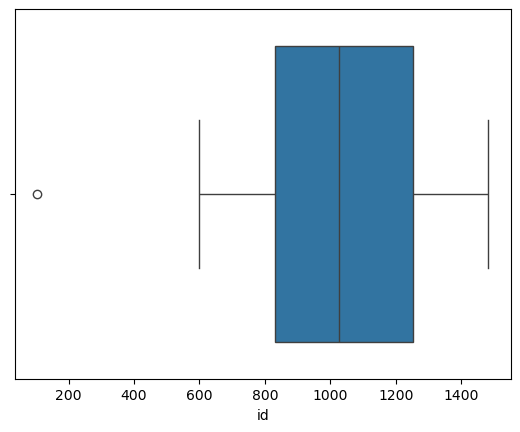

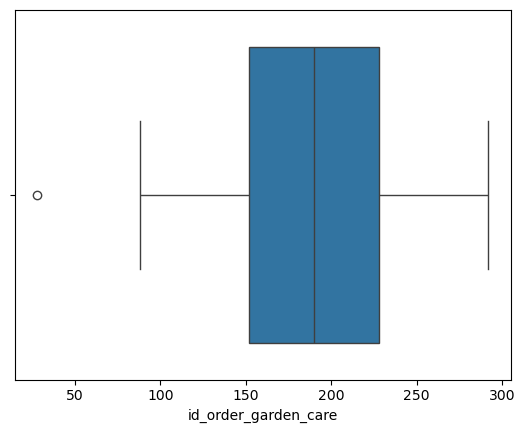

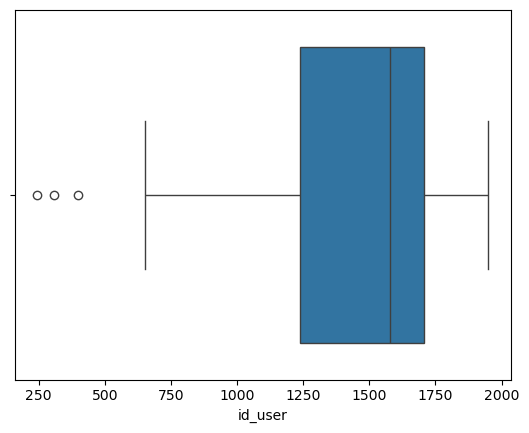

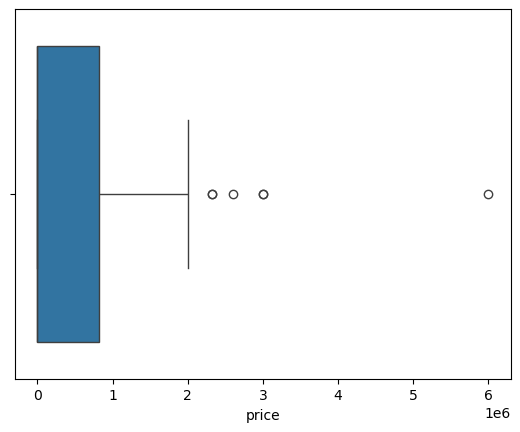

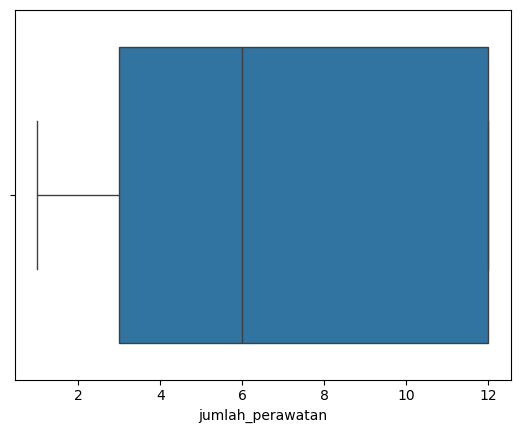

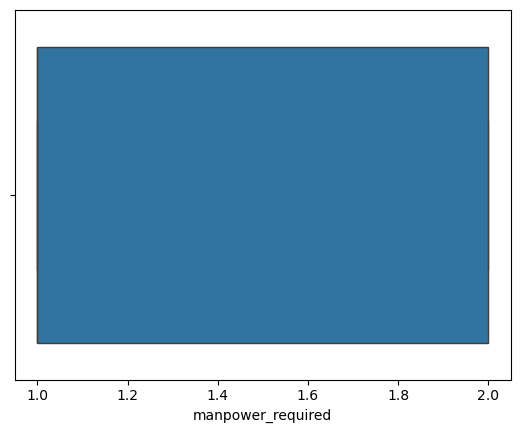

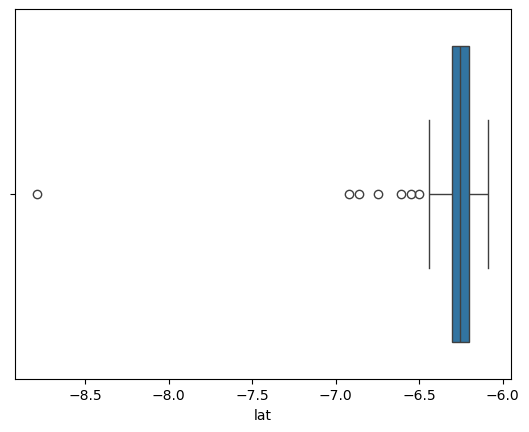

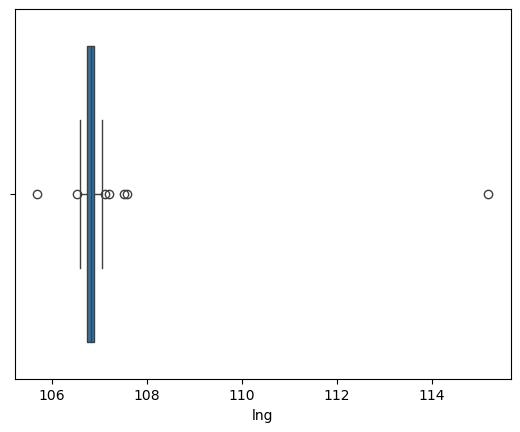

In [63]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_ogc_num:
    sns.boxplot(data = df_ogc_num, x = i)
    plt.show()

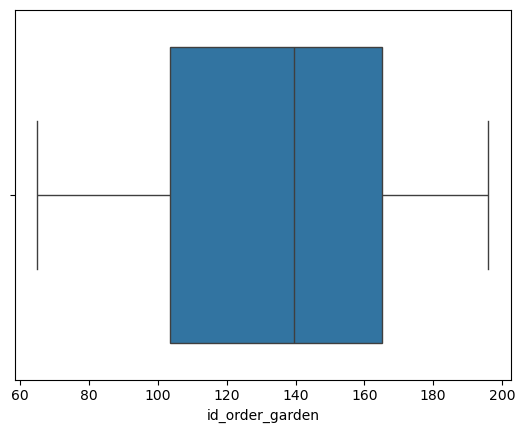

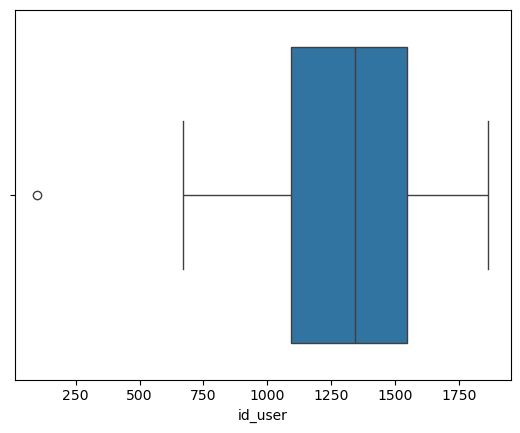

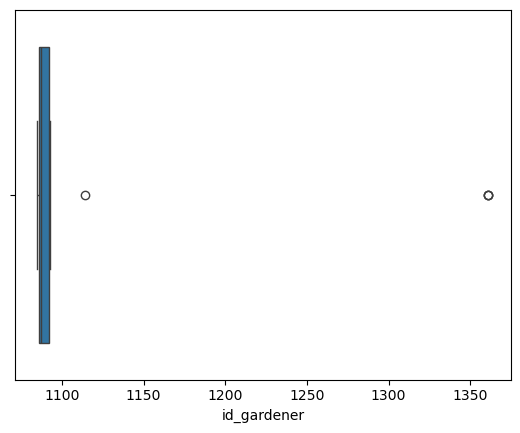

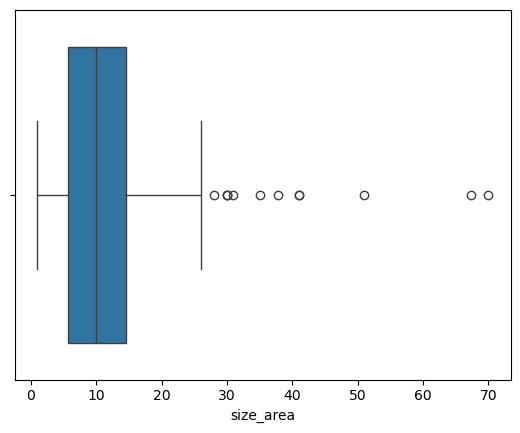

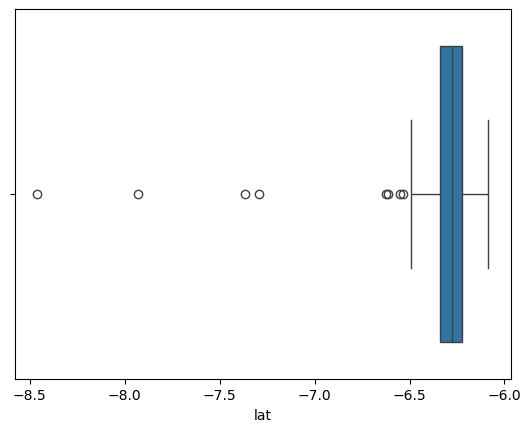

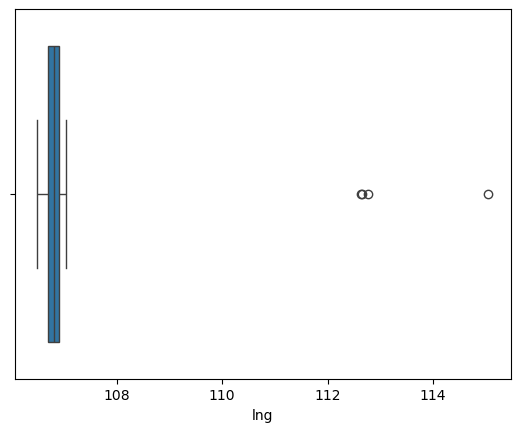

In [64]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_og_num:
    sns.boxplot(data = df_og_num, x = i)
    plt.show()

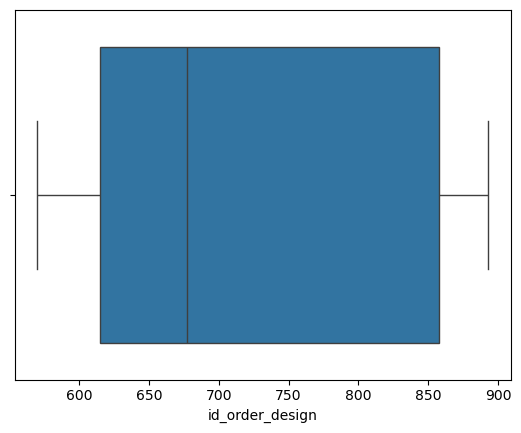

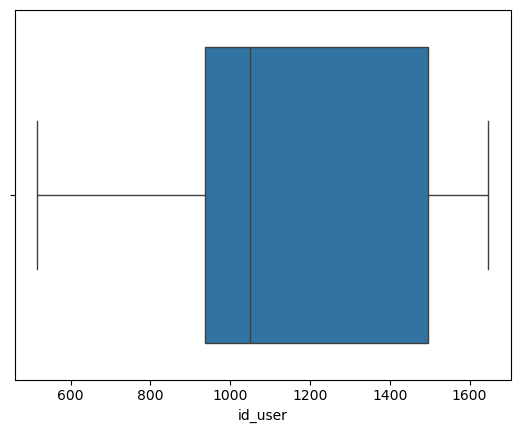

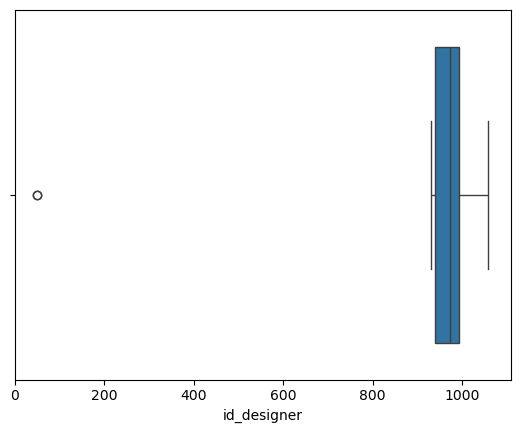

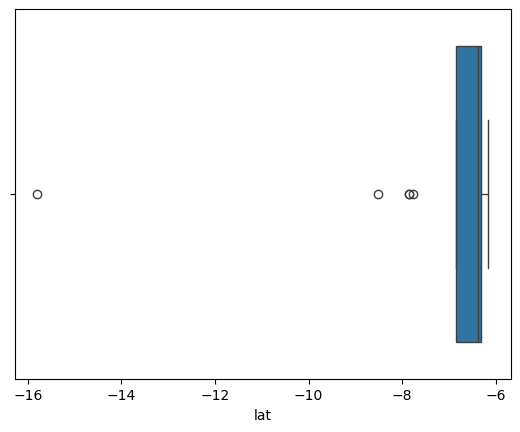

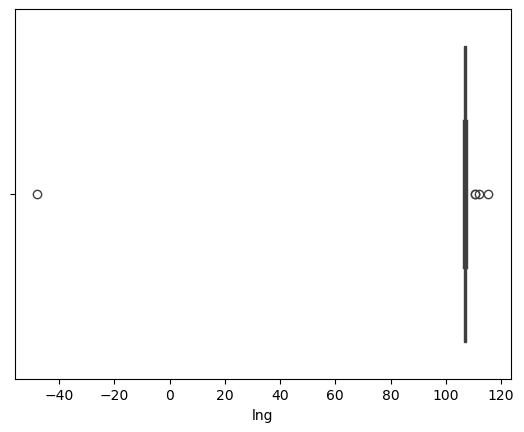

In [65]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_od_num:
    sns.boxplot(data = df_od_num, x = i)
    plt.show()

In [66]:
# function to find outliers, using numpy 
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q2 = np.quantile(data, .50) # median
    Q3 = np.quantile(data, .75)

    # find IQR
    IQR = (Q3 - Q1) * 1.5 
    lower_limit = Q1 - IQR 
    upper_limit = Q3 + IQR 

    # find outliers
    outliers = ''
    for i in range(len(data)): 
        if data[i] > upper_limit: 
            outliers = outliers + str(data[i]) + ', '
            
        elif data[i] < lower_limit: 
            outliers = outliers + str(data[i]) + ', '
            
    return outliers

In [68]:
# detect outliers from each columns using loop 
for i in df_ogc_num: 
    val = df_ogc_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id': 5 (4.95%)
Outliers detected in 'id_order_garden_care': 4 (3.96%)
Outliers detected in 'id_user': 15 (14.85%)
Outliers detected in 'price': 66 (65.35%)
Outliers detected in 'jumlah_perawatan': 0 (0.00%)
Outliers detected in 'manpower_required': 0 (0.00%)
Outliers detected in 'lat': 70 (69.31%)
Outliers detected in 'lng': 63 (62.38%)


In [69]:
# detect outliers from each columns using loop 
for i in df_og_num: 
    val = df_og_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id_order_garden': 0 (0.00%)
Outliers detected in 'id_user': 5 (5.43%)
Outliers detected in 'id_gardener': 0 (0.00%)
Outliers detected in 'size_area': 72 (78.26%)
Outliers detected in 'lat': 80 (86.96%)
Outliers detected in 'lng': 36 (39.13%)


In [70]:
# detect outliers from each columns using loop 
for i in df_od_num: 
    val = df_od_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id_order_design': 0 (0.00%)
Outliers detected in 'id_user': 0 (0.00%)
Outliers detected in 'id_designer': 0 (0.00%)
Outliers detected in 'lat': 49 (222.73%)
Outliers detected in 'lng': 46 (209.09%)


### Find Optimal K Using Elbow Method

### Clustering Order Garden Care

In [83]:
# find k 
k = range(1, 10)
inertia = []

for i in k: 
    model = KMeans(n_clusters=i)
    model.fit(df_ogc[["lat","lng"]])
    inertia.append(model.inertia_)

In [84]:
# print inertia
print(inertia)

[81.12276722628319, 5.417675201715991, 4.147116967094243, 2.0425475231773254, 1.273400416793654, 0.9214444437589333, 0.6136646169680312, 0.522764848492449, 0.4168918558958971]


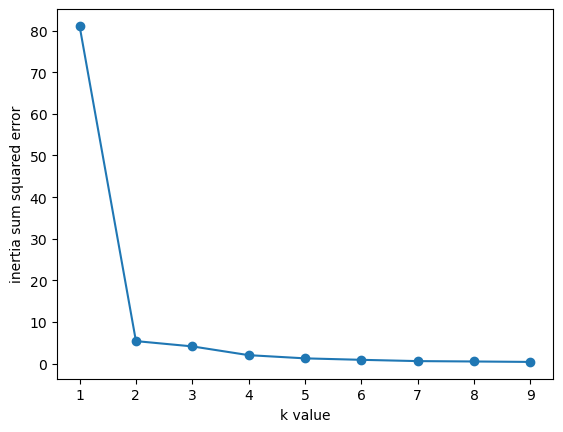

In [85]:
# plot the elbow 
plt.plot(k, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [103]:
# fit kmeans model 
model = KMeans(n_clusters= 4, max_iter= 1000, random_state=0)
model.fit(df_ogc[["lat","lng"]])

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [104]:
df_ogc.head()

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02


In [105]:
# predict clusters 
df_ogc['cluster'] = model.predict(df_ogc[["lat","lng"]])
df_ogc.head()

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44,3
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30,3
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54,0
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45,3
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02,3


In [106]:
df_ogc

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44,3
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30,3
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54,0
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45,3
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02,3
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1424,278,paid,1349,0.0,1,1,Nama Klien: Ruben onsu/ Sarwendah\nAlamat : Jl...,-6.28399,106.799,2024-11-10 17:25:39,3
97,1426,279,paid,1349,0.0,12,1,DKI Jakarta,-6.19445,106.823,2024-11-10 17:30:09,3
98,1449,287,paid,1937,0.0,12,1,"alia residence, jln. alia 6 no. 22 Jatimelati ...",-6.31348,106.937,2024-11-12 11:22:32,3
99,1473,289,paid,1451,0.0,6,1,Cluster nara village Jalan boulevard no.17,-6.16404,106.903,2024-11-12 14:25:56,3


In [107]:
df_ogc[df_ogc['cluster'] == 0]

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54,0
9,699,118,paid,1230,1549500.0,6,2,Pandeglang,-6.74827,105.688,2024-08-04 08:02:09,0
10,706,119,paid,1152,1049500.0,6,1,Pinang,-6.21526,106.690,2024-08-04 09:30:39,0
11,710,120,paid,1401,0.0,6,1,Pondok Aren,-6.25572,106.689,2024-08-07 13:56:08,0
27,849,157,paid,1637,0.0,3,2,cluster visana at the savia blok K7 15,-6.31184,106.700,2024-09-09 10:51:52,0
28,857,159,paid,1644,0.0,3,1,Perumahan H City Sawangan komplek Borneo Blok ...,-6.41209,106.735,2024-09-10 13:17:44,0
29,860,160,paid,1645,0.0,12,1,Citra garden 6 blue ginger h9/16b tegal alur k...,-6.12690,106.711,2024-09-10 13:25:59,0
30,872,162,paid,1666,0.0,12,2,Topaz raya no 1. PHG sumarecon serpong,-6.25394,106.631,2024-09-16 18:50:46,0
31,886,163,paid,1667,0.0,12,1,"Taman Senayan 3, Blok HH 1 no.35 Jl. Gelora Ut...",-6.28288,106.706,2024-09-16 18:56:21,0
32,897,164,paid,1668,0.0,3,1,Jade utara 3 no.12 Pondok Hijau Golf Summarec...,-6.25089,106.631,2024-09-16 19:01:27,0


In [108]:
df_ogc[df_ogc['cluster'] == 1]

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
36,921,172,paid,1671,0.0,3,1,"""Perumahan Taman Griya\nJalan Danau Buyan Bara...",-8.78764,115.185,2024-09-17 07:13:12,1


In [109]:
df_ogc[df_ogc['cluster'] == 2]

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
44,981,182,paid,1691,0.0,3,1,Ke jl jamika baru i no 26\nJl. Jamika Baru I N...,-6.91972,107.585,2024-09-21 12:20:10,2
50,1025,190,paid,1708,0.0,3,2,"Komp. Awani Residence Cluster Kanti blok E02C,...",-6.86234,107.512,2024-09-25 14:04:48,2


In [110]:
df_ogc[df_ogc['cluster'] == 3]

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44,3
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30,3
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45,3
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02,3
5,653,106,paid,1356,787125.0,6,1,"komp pertambangan duren tiga, jl saguling no 1...",-6.25530,106.831,2024-07-27 14:37:20,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1415,274,paid,1207,0.0,6,1,Jl. Bintaro Permai II Nomer 7D. RT 003/009. Ke...,-6.25915,106.764,2024-11-08 09:59:40,3
96,1424,278,paid,1349,0.0,1,1,Nama Klien: Ruben onsu/ Sarwendah\nAlamat : Jl...,-6.28399,106.799,2024-11-10 17:25:39,3
97,1426,279,paid,1349,0.0,12,1,DKI Jakarta,-6.19445,106.823,2024-11-10 17:30:09,3
98,1449,287,paid,1937,0.0,12,1,"alia residence, jln. alia 6 no. 22 Jatimelati ...",-6.31348,106.937,2024-11-12 11:22:32,3


In [111]:
# counts each clusters 
df_ogc['cluster'].value_counts()

cluster
3    70
0    28
2     2
1     1
Name: count, dtype: int64

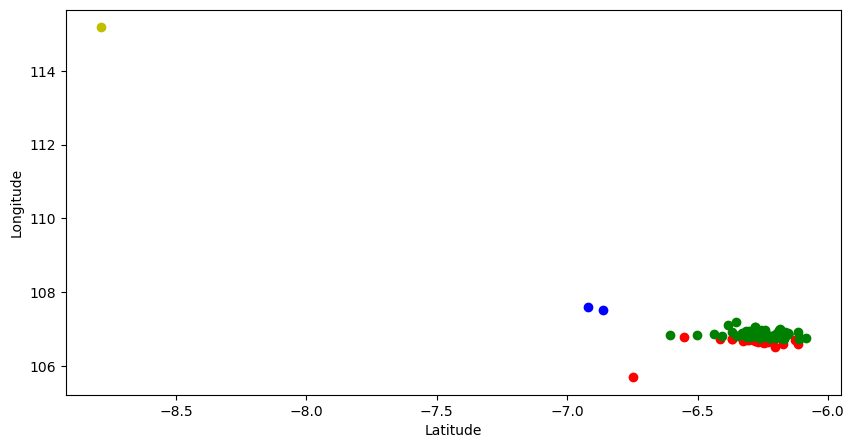

In [112]:
# plot the clusters 
plt.figure(figsize=(10,5))

plt.plot(df_ogc["lat"][df_ogc['cluster'] == 0], df_ogc["lng"][df_ogc['cluster'] == 0], 'ro')
plt.plot(df_ogc["lat"][df_ogc['cluster'] == 1], df_ogc["lng"][df_ogc['cluster'] == 1], 'yo')
plt.plot(df_ogc["lat"][df_ogc['cluster'] == 2], df_ogc["lng"][df_ogc['cluster'] == 2], 'bo')
plt.plot(df_ogc["lat"][df_ogc['cluster'] == 3], df_ogc["lng"][df_ogc['cluster'] == 3], 'go')


plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()